In [94]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [59]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_1 = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [13]:
df_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df_1.drop(df_1[df_1['Age'].isna()].index, inplace=True)
df_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
X = df_1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
Y = df_1['Survived']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [23]:
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

получаем метрики для модели на необработанных данных:

In [24]:
model.score(X_train, Y_train)

0.712784588441331

In [25]:
model.score(X_test, Y_test)

0.6923076923076923

формируем подготовленные данные:

признаки PassengerId и Name индивидувльные и не могут помочь в классификации, место отправления (Embarked) тоже маловероятно
может повлиять на успех в деле выживания.

In [107]:
df_2 = data[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']]

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Sex       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


очевидно, признак Cabin заполнен менее, чем на 25%, следовательно тоже не информативен

In [108]:
df_2 = data[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']]

In [41]:
df_2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


если удалить строки с пропущенными значениями возраста, то потеряем 20% данных

In [109]:
df_2[df_2['Age'].isna()]

,Survived,Pclass,Age,Sex,SibSp,Parch,Ticket,Fare
5,0,3,NaN,male,0,0,330877,8.4583
17,1,2,NaN,male,0,0,244373,13.0000
19,1,3,NaN,female,0,0,2649,7.2250
26,0,3,NaN,male,0,0,2631,7.2250
28,1,3,NaN,female,0,0,330959,7.8792
...,...,...,...,...,...,...,...,...
859,0,3,NaN,male,0,0,2629,7.2292
863,0,3,NaN,female,8,2,CA. 2343,69.5500
868,0,3,NaN,male,0,0,345777,9.5000
878,0,3,NaN,male,0,0,349217,7.8958


средний возраст мужчин и женщин на борту отличается, заполним пропуски, учитывая специфику

In [110]:
df_2[df_2['Sex'] == 'male']['Age'].mean()

30.72664459161148

In [88]:
df_2[df_2['Sex'] == 'female']['Age'].mean()

27.915708812260537

In [111]:
man_age = df_2[df_2['Sex'] == 'male']['Age'].median()
woman_age = df_2[df_2['Sex'] == 'female']['Age'].median()

In [112]:
df_2.loc[(df_2['Sex'] == 'female') & (df_2['Age'].isna()), ['Age']] = woman_age
df_2.loc[(df_2['Sex'] == 'male') & (df_2['Age'].isna()), ['Age']] = man_age

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [113]:
df_2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
df_ = df_2[['Ticket', 'Survived']].groupby('Ticket').count().reset_index()
df_ = df_2.merge(df, on = 'Ticket')
del df_['Ticket']
df_.rename(columns={'Survived_x': 'Survived', 'Survived_y':'Ticket'}, inplace=True)
df_.head()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Ticket
0,0,3,22.0,male,1,0,7.2500,1
1,1,1,38.0,female,1,0,71.2833,1
2,1,3,26.0,female,0,0,7.9250,1
3,1,1,35.0,female,1,0,53.1000,2
4,0,1,37.0,male,1,0,53.1000,2


In [115]:
le = LabelEncoder()
le.fit( df_['Sex'])
df_['Sex_'] = le.transform(df_['Sex'])
del df_['Sex']

In [116]:
df_.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket,Sex_
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208,1.787879,0.647587
std,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429,1.361142,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,7.000000,1.000000


<AxesSubplot:title={'center':'Распределение возрастов пассажиров'}>

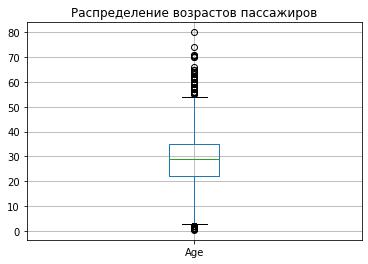

In [103]:
df_['Age'].plot(kind='box',
                   title='Распределение возрастов пассажиров', grid=True)

<AxesSubplot:title={'center':'Распределение стоимости билетов'}>

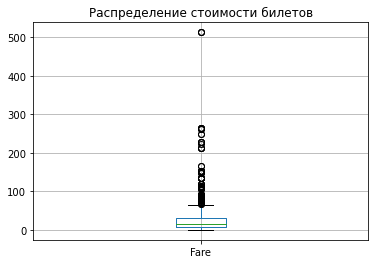

In [104]:
df_['Fare'].plot(kind='box',
                   title='Распределение стоимости билетов', grid=True)

судя по статистике, выбросами можно считать значение fare = 512.329200, удаляем

In [120]:
df_.drop(df_[df_['Fare'] == 512.329200].index, inplace=True)
df_.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket,Sex_
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,29.421363,0.524775,0.381757,30.582164,1.783784,0.647523
std,0.486091,0.834007,13.036198,1.104186,0.806949,41.176366,1.361612,0.478011
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.771850,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,7.000000,1.000000


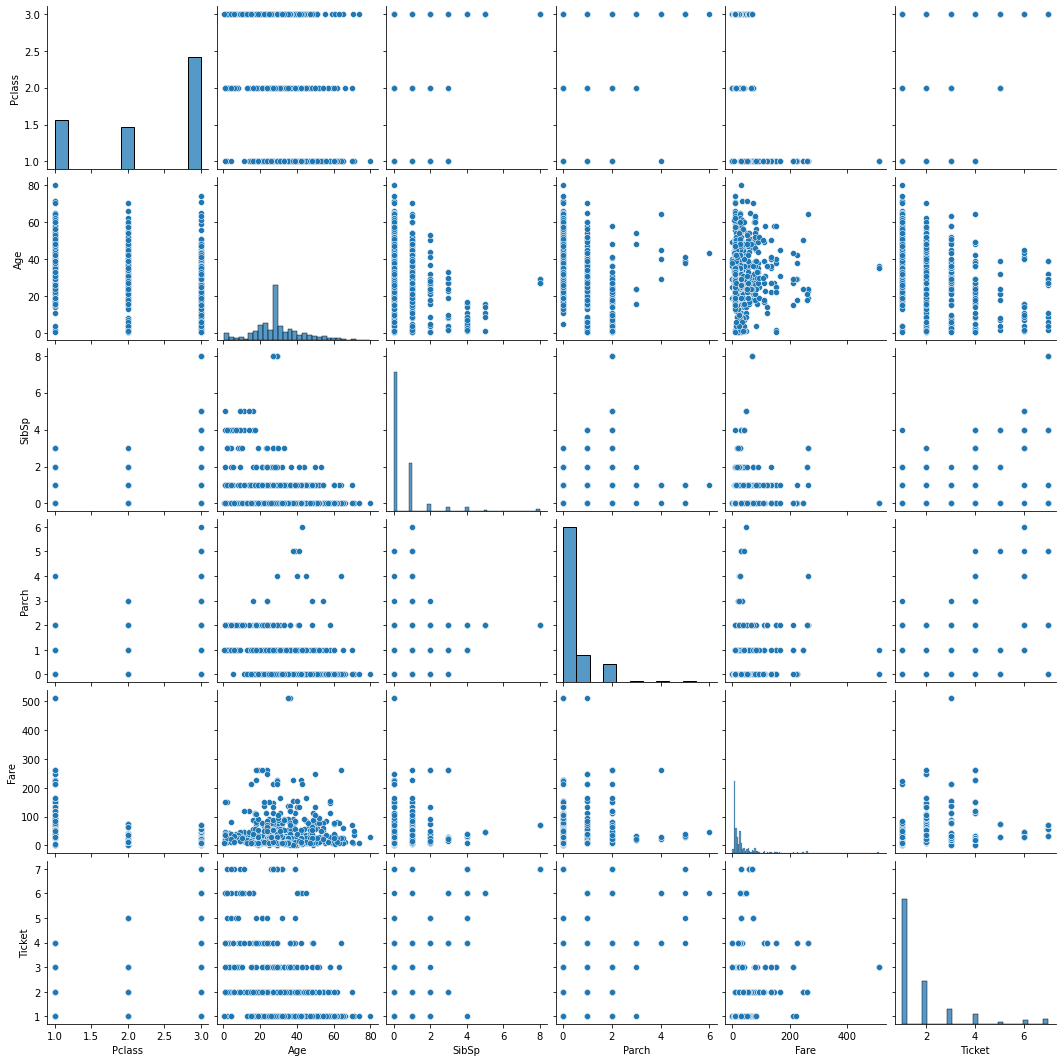

In [95]:
sns.pairplot(df_[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket']])

In [121]:
X = df_[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Sex_']]
Y = df_['Survived']

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [123]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [124]:
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [125]:
model.score(X_train, Y_train)

0.7845070422535211

In [126]:
model.score(X_test, Y_test)

0.8146067415730337

В результате обработки данных (удаление неинформативных признаков, заполнение пропусков медианными значениями, удаление
выбросов, преобразование категориальных переменых) увеличили точность предсказаний на тесте на 10%. Таким образом, очевидна 
целесообразность такой предобработки данных.